# 📚 Bibliotecas

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 🛠 Preparação dos Dados

## Extração

In [17]:
df = pd.read_csv('telecomX1.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Contas_Diarias,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [19]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Contas_Diarias',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

## Remoção de Colunas Irrelevantes

In [20]:
#excluir col ID
df = df.drop(columns = ['customerID'])

Agrupamento de No e No service

In [21]:
# para criar um novo
df_clean = df.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

# === Etapa 2: One-hot encoding (sem dummy trap)
categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Pronto para usar!
df_encoded

,customer.SeniorCitizen,customer.tenure,Contas_Diarias,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [22]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Contas_Diarias                                 7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

In [23]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Contas_Diarias,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


Tratamento de valores nulos

In [24]:
# Verifica valores nulos nas duas colunas
print(df_encoded[['Contas_Diarias', 'account.Charges.Total']].isnull().sum())

Contas_Diarias           11
account.Charges.Total    11
dtype: int64


In [25]:
# Remove linhas com valores nulos nas colunas especificadas
df_encoded = df_encoded.dropna(subset=['Contas_Diarias', 'account.Charges.Total'])

In [26]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Contas_Diarias,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


#🎯 Correlação e Seleção de Variáveis

## Análise de Correlação

In [27]:
corr = df_encoded.corr()

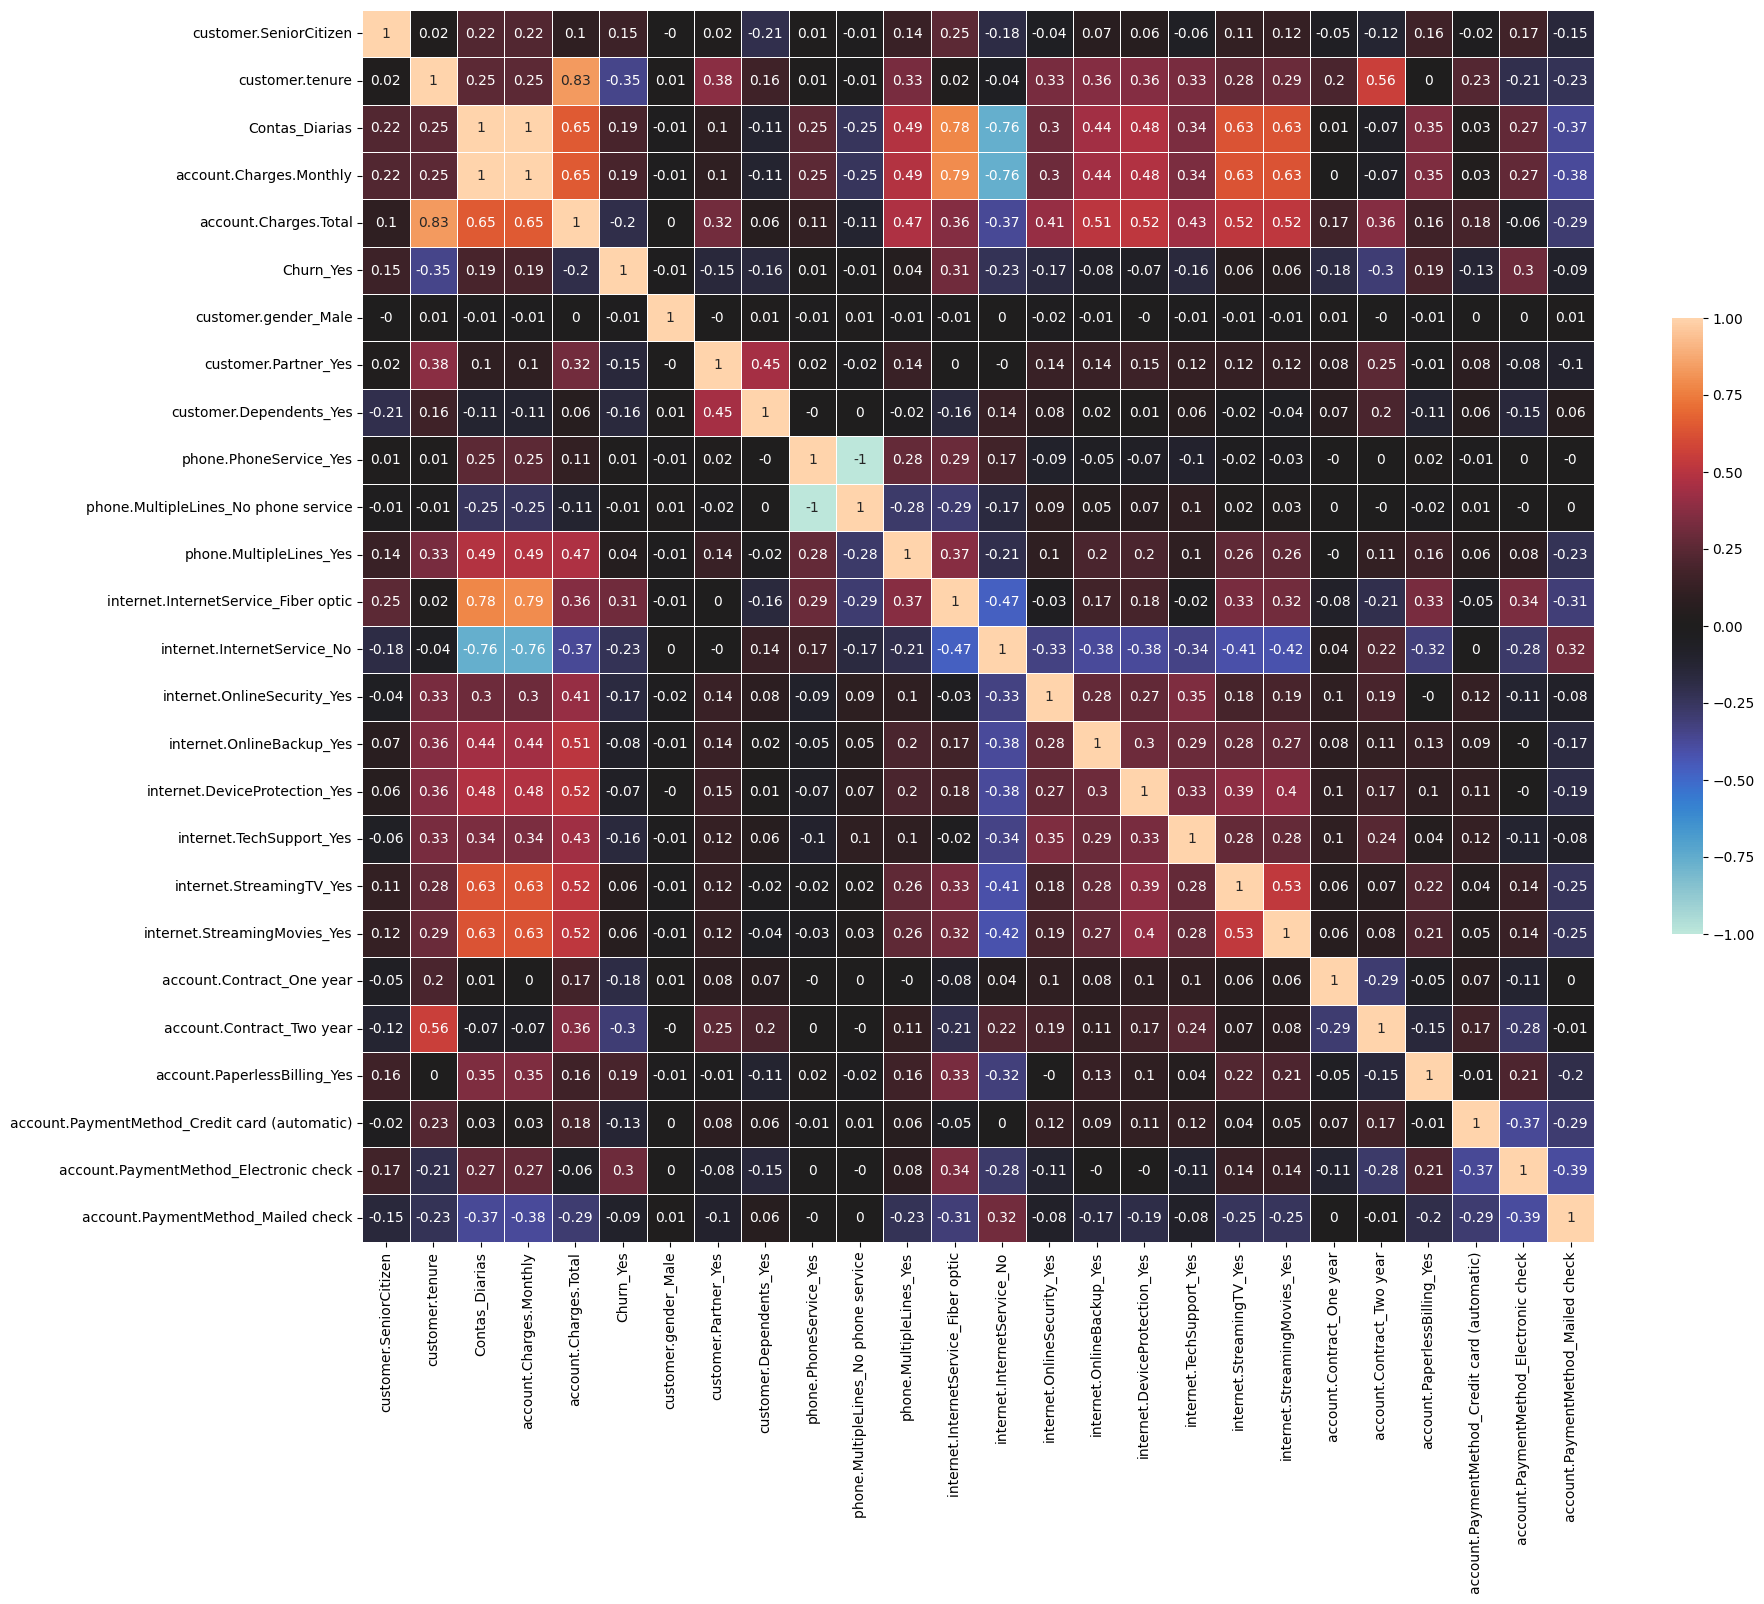

In [28]:
import numpy as np # Import the numpy library

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

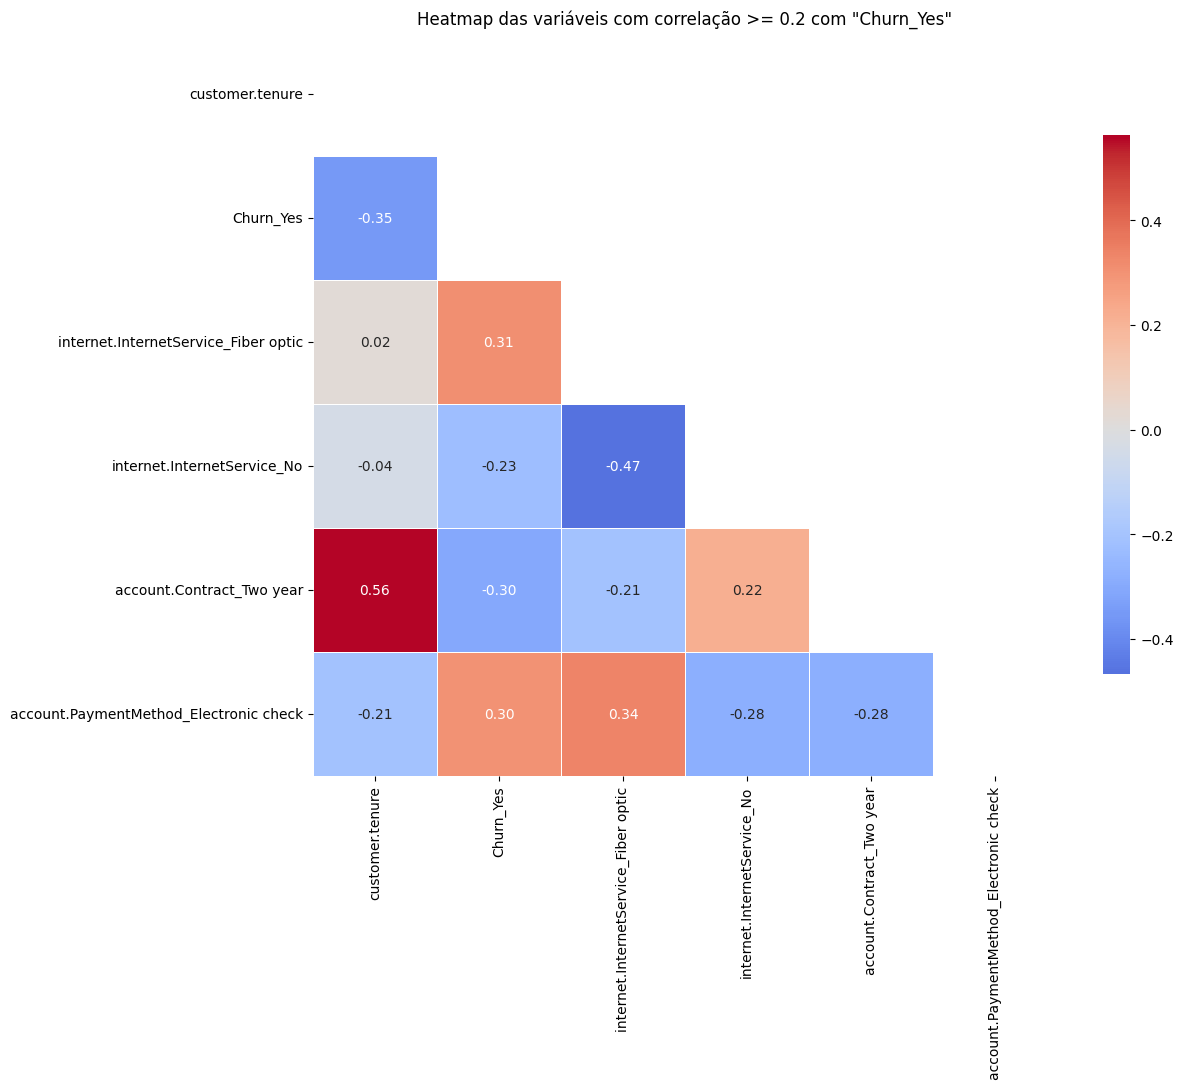

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


# Definir a variável alvo
target_var = 'Churn_Yes'

# Definir o limiar mínimo de correlação absoluta para seleção
limiar = 0.2

# Filtrar variáveis que tenham correlação absoluta >= limiar com a variável alvo
# Isso cria uma lista com as variáveis relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Garantir que a variável alvo está na lista (se não estiver, adiciona)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Criar uma matriz de correlação somente com as variáveis selecionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Gerar uma máscara para esconder o triângulo superior da matriz (incluindo diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Plotar o heatmap com a máscara aplicada para melhor visualização
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

## 🔍 Análise de Multicolinearidade

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [31]:
# Aqui, não inclua a variável-alvo (ex: Churn_Yes) no cálculo do VIF.
X = df_encoded.drop(columns=['Churn_Yes'])

In [32]:
X_const = add_constant(X)

In [33]:
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular o VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Exibir os resultados
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,992.623632
12,internet.InternetService_Fiber optic,148.504277
3,Contas_Diarias,133.792125
13,internet.InternetService_No,104.217179
19,internet.StreamingMovies_Yes,24.158588
18,internet.StreamingTV_Yes,24.080021
5,account.Charges.Total,10.871350
2,customer.tenure,7.613525


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ====== Etapa 1: Copiar X original para não modificar o original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover variáveis com multicolinearidade perfeita (VIF = inf) ======
cols_to_drop = [
    "phone.PhoneService_Yes",               # Altamente colinear com "MultipleLines"
    "phone.MultipleLines_No phone service"  # Redundante com ausência de telefone
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# ====== Etapa 3: Remover redundâncias fortes entre variáveis numéricas ======
# Se 'Total.Day' e 'Charges.Total' são derivados de 'Monthly' e 'tenure', mantemos só um
X_filtered.drop(columns=["Contas_Diarias"], inplace=True)

# ====== Etapa 4: Remover redundância entre dummies da mesma variável categórica ======
# Se usou get_dummies sem drop_first, você tem dummies redundantes para InternetService
X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)

# ====== Etapa 5: Garantir que os dados estão em float para o VIF funcionar ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular o VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Exibir os resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,36.498367
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# === Remover a variável account.Charges.Total ===
X_final = X_filtered.drop(columns=["account.Charges.Total"])

# === Recalcular o VIF ===
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# === Exibir os resultados ordenados ===
display(vif_data_final.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,29.602764
3,account.Charges.Monthly,17.283226
8,internet.InternetService_Fiber optic,6.936112
2,customer.tenure,2.826197
16,account.Contract_Two year,2.521228
13,internet.StreamingTV_Yes,2.166619
14,internet.StreamingMovies_Yes,2.163842
19,account.PaymentMethod_Electronic check,1.964004
20,account.PaymentMethod_Mailed check,1.825717
12,internet.TechSupport_Yes,1.712098


# 🤖 Modelagem Preditiva

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

## Separação de Dados


 Separar features e target

In [37]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

Dividir treino e teste

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [41]:
# Instanciar e treinar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regressão Logística
Acurácia: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de Confusão:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



In [42]:
# Instanciar e treinar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Acurácia: 0.7786729857819905
ROC AUC: 0.8241588788810905
Matriz de Confusão:
 [[1307  242]
 [ 225  336]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



# 📋 Interpretação e Conclusões

## Conclusão

📊 Relatório de Análise de Evasão de Clientes

🔍 1. Preparação dos Dados

Coluna customerID foi removida por não contribuir para a análise.
Valores como "No internet service" foram agrupados como "No" para simplificar variáveis binárias.
Aplicado one-hot encoding para variáveis categóricas, evitando o dummy trap.

🧹 2. Tratamento de Dados

Linhas com valores nulos nas colunas Contas_Diarias e account.Charges.Total foram removidas.
Dados numéricos foram normalizados com StandardScaler.

📈 3. Seleção de Variáveis

Utilizada correlação com a variável alvo Churn_Yes para selecionar variáveis com correlação ≥ 0.2.
Análise de multicolinearidade com VIF (Variance Inflation Factor) para remover variáveis redundantes.

🤖 4. Modelagem Preditiva

Modelos utilizados:
Regressão Logística
Random Forest
Dados foram balanceados com SMOTE para lidar com desbalanceamento da classe Churn.

📊 5. Avaliação dos Modelos

Métricas utilizadas:
Acurácia
ROC AUC
Matriz de Confusão
Relatório de Classificação

🌟 6. Principais Fatores que Influenciam a Evasão
Com base na importância das variáveis do modelo Random Forest, os fatores mais relevantes (esperados) incluem:

Tipo de contrato (account.Contract)

Cobertura de segurança online (internet.OnlineSecurity)

Cobertura de suporte técnico (internet.TechSupport)

Faturamento mensal (account.Charges.Total)

Serviços de streaming (internet.StreamingTV, internet.StreamingMovies)

Método de pagamento (account.PaymentMethod)

Serviço de backup (internet.OnlineBackup)

Presença de dependentes (customer.Dependents)

Faturamento sem papel (account.PaperlessBilling)

Serviço de proteção de dispositivos (internet.DeviceProtection)

💡 Estratégias de Retenção Propostas
Com base nos fatores identificados:

1. Melhoria nos Planos de Contrato
Incentivar contratos de longo prazo com benefícios exclusivos.
2. Investimento em Serviços de Valor Agregado
Oferecer segurança online, suporte técnico e backup como parte dos pacotes.
3. Transparência e Flexibilidade no Faturamento
Reduzir surpresas no faturamento e oferecer opções de pagamento mais acessíveis.
4. Segmentação de Clientes
Criar campanhas específicas para clientes com dependentes ou que usam serviços de streaming.
5. Monitoramento Proativo
Identificar clientes com alto risco de evasão e oferecer suporte personalizado.
